In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.shape

(200, 5)

In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0, 0.5, 'Count')

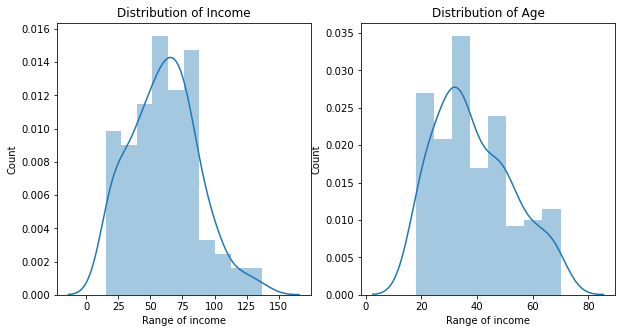

In [5]:
#distribution of Income and Age

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Income')
plt.xlabel('Range of income')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.distplot(data['Age'])
plt.title('Distribution of Age')
plt.xlabel('Range of income')
plt.ylabel('Count')

In [4]:
# Using Annual Income and Spending score for our model
#df =data.iloc[:,[3,4]].values
df =data.iloc[:,[2,3]].values
print(df.shape)

(200, 2)


In [10]:
# model building using random number for clusters 
from sklearn.cluster import KMeans
km=KMeans(n_clusters=2,init='k-means++',max_iter=300,n_init=10,random_state=41)

In [11]:
km.fit(df)

KMeans(n_clusters=2, random_state=41)

In [12]:
print(km.labels_)
print(km.cluster_centers_)
print("No of iterations=", km.n_iter_)
print(km.inertia_)   #  inertia is the within cluster sum of squares 


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[42.21904762 40.78095238]
 [35.12631579 82.42105263]]
No of iterations= 6
87121.56591478694


In [17]:
y_means=km.fit_predict(df)

#To plot the clusters we should separate the tuples(Annual income, Age, as per their labels )
#Therefore df[y_means==0, 0] will give the  age  values with label 0
#df[y_means==0, 1]  will give the annual values with label 0
#Likewise  df[y_means==1, 0]   and df[y_means==1, 1] will return the age and annual income for label 1
#These (x,y) coordinates can then be plotted in different colors to see the clutsers


In [18]:
df[y_means==0,0]

array([19, 21, 20, 23, 31, 22, 35, 23, 64, 30, 67, 35, 58, 24, 37, 22, 35,
       20, 52, 35, 35, 25, 46, 31, 54, 29, 45, 35, 40, 23, 60, 21, 53, 18,
       49, 21, 42, 30, 36, 20, 65, 24, 48, 31, 49, 24, 50, 27, 29, 31, 49,
       33, 31, 59, 50, 47, 51, 69, 27, 53, 70, 19, 67, 54, 63, 18, 43, 68,
       19, 32, 70, 47, 60, 60, 59, 26, 45, 40, 23, 49, 57, 38, 67, 46, 21,
       48, 55, 22, 34, 50, 68, 48, 40, 32, 47, 48, 49, 67, 49, 66, 54, 68,
       66, 65, 63], dtype=int64)

Text(0, 0.5, 'Age')

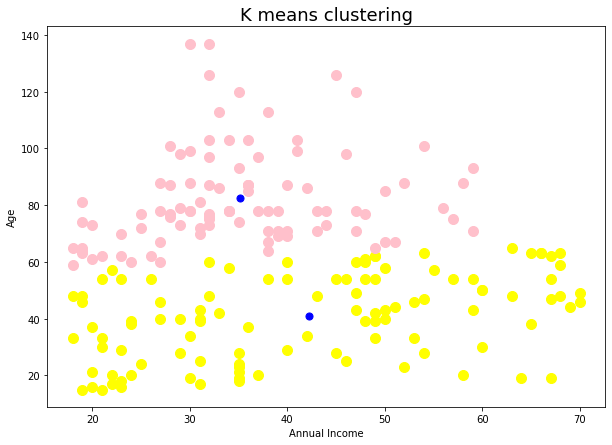

In [19]:
plt.figure(figsize=(10,7))
plt.scatter(df[y_means==0,0],df[y_means==0,1],s=100,c='yellow')
plt.scatter(df[y_means==1,0],df[y_means==1,1],s=100,c='pink')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=50,c='blue',label='centroid')
plt.title('K means clustering',fontsize=18)
plt.xlabel("Annual Income")
plt.ylabel('Age')
#plt.ylabel('Spending score')

In [20]:
# silhouette_score computes the mean Silhouette Coefficient of all samples.
#The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. 
#Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df,y_means)
silhouette_avg

0.42620850066216065

### Building model by iterating over different cluster values and finding the best value

In [21]:
#taking the range for centroids from 1 to 10
wcss =[]
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

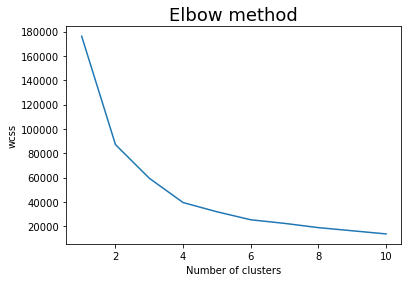

In [23]:
#plt.figure(figsize)
plt.plot(range(1,11),wcss)
plt.title('Elbow method',fontsize=18)
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

In [ ]:
#we can see from the elbow plot that your optimum cluster value is 5 , so let's build our model on that.

In [24]:
km=KMeans(n_clusters=5,init='k-means++',n_init=10,max_iter=300)
y_means=km.fit_predict(df)

silhouette_avg = silhouette_score(df,y_means)
print(silhouette_avg)

0.40464391339109745


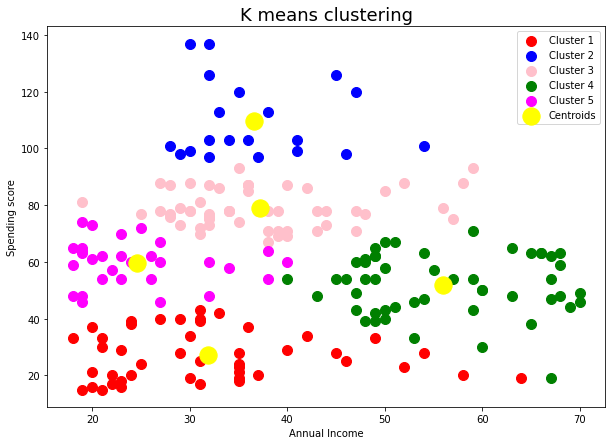

In [25]:
plt.figure(figsize=(10,7))
plt.scatter(df[y_means==0,0],df[y_means==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(df[y_means==1,0],df[y_means==1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(df[y_means==2,0],df[y_means==2,1],s=100,c='pink',label='Cluster 3')
plt.scatter(df[y_means==3,0],df[y_means==3,1],s=100,c='green',label='Cluster 4')
plt.scatter(df[y_means==4,0],df[y_means==4,1],s=100,c='magenta',label='Cluster 5')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')

plt.title('K means clustering',fontsize=18)
plt.xlabel("Annual Income")
plt.ylabel('Spending score')
plt.legend()
#plt.grid()
plt.show()

## Hierachial clustering

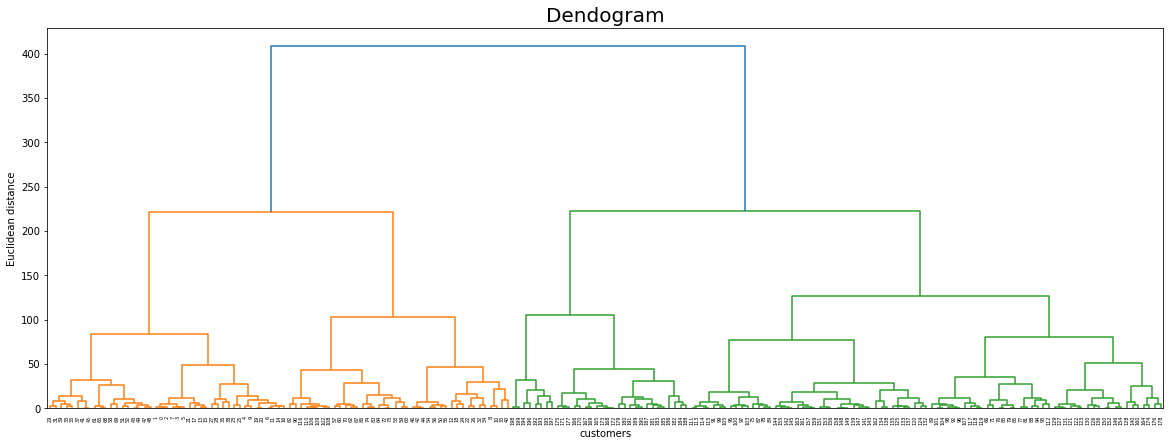

In [11]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(20,7))
dendrogram = sch.dendrogram(sch.linkage(df, method='ward'))
plt.title('Dendogram',fontsize=20)
plt.xlabel('customers')
plt.ylabel('Euclidean distance')
plt.show()


In [9]:
from sklearn.cluster import AgglomerativeClustering

hc= AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_hc= hc.fit_predict(df)
print (y_hc)

[3 3 3 3 3 3 3 3 1 3 1 3 1 3 3 3 3 3 1 3 3 3 1 3 1 3 1 3 3 3 1 3 1 3 1 3 3
 3 3 3 1 3 1 3 1 3 1 3 3 3 1 3 3 1 1 1 1 1 3 1 1 3 1 1 1 3 2 1 3 3 1 2 1 1
 1 4 2 2 4 2 1 2 1 2 4 2 1 4 2 2 1 4 2 2 2 4 2 4 2 4 4 2 1 4 2 4 1 2 1 1 1
 4 2 4 4 4 1 2 2 2 4 2 2 2 4 4 2 2 2 2 2 2 4 4 4 4 2 4 4 4 2 4 4 4 4 4 2 4
 4 4 2 4 2 4 2 4 4 4 4 4 2 4 4 4 2 0 0 0 0 0 0 0 0 0 2 0 2 0 2 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


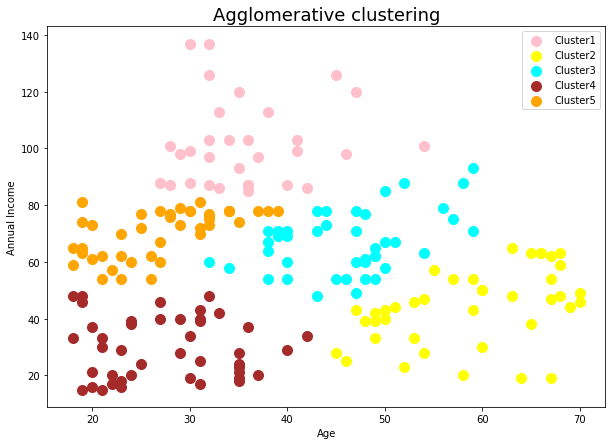

In [12]:
plt.figure(figsize=(10,7))
plt.scatter(df[y_hc==0,0],df[y_hc==0,1],s=100,c='pink',label='Cluster1')
plt.scatter(df[y_hc==1,0],df[y_hc==1,1],s=100,c='yellow',label='Cluster2')
plt.scatter(df[y_hc==2,0],df[y_hc==2,1],s=100,c='cyan',label='Cluster3')
plt.scatter(df[y_hc==3,0],df[y_hc==3,1],s=100,c='brown',label='Cluster4')
plt.scatter(df[y_hc==4,0],df[y_hc==4,1],s=100,c='orange',label='Cluster5')

plt.title('Agglomerative clustering',fontsize=18)
plt.xlabel("Age")
plt.ylabel('Annual Income')
plt.legend()
plt.show()
